<h1>Coffee (Worldwide) - Data Visualisation</h1>

<h2>List of content:</h2>
<ol>
    <li>Used Libraries</li>
    <li>Functions</li>
    <li>Connecting to database</li>
    <li>Loading data</li>
    <li>Creating tables</li>
    <li>Analasys:</li>
    <ul>
        <li>Analysis Goals</li>
        <li>Analising data:</li>
        <ul>
            <li>Domestic Consumption</li>
            <li>Imports</li>
            <li>Retail Prices</li>
            <li>Total Production</li>
        </ul>
    </ul>
 </ol>

<h3>1. Used Libraries</h3>

In [1]:
import csv
import sqlite3 as sql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>2. Functions</h3>

<h4><b>1) Table Creator</b></h4>
<p>
    &ensp;<b>Description:</b></br> 
    &ensp;Create table based on given name, .csv file,</br> 
    &ensp;CREATE (queryCreate) and INSERT (queryInsert) queries.
</p>
<p>
    &ensp;<b style = "color:red";>NOTE</b></br>
    &ensp;
    If database exist, code won't be executed and will return OperationalError.
    </br>
    &ensp;To make it work, delete file called "coffee.db" from folder.</br>
</p>

In [2]:
def createTable(file, tableName, queryCreate, queryInsert):
    
    variablesTemp = []  #   Creating list of variables used in queryCreate
                        #   which will contain table name and column names

    variablesTemp.append(tableName)

    with open(file) as f:
        readf = csv.reader(f, delimiter= ';')
        header = next(readf)   #    list of column names 
        [variablesTemp.append(col) for col in header]
        cur.execute(queryCreate % tuple(variablesTemp))  #   Executing query
        rows = [row for row in readf]

        #   Inserting data into table
        for row in rows:
            variablesTemp = []  #   Creating list of variables used in queryInsert
                                #   which will contain table name and data
            variablesTemp.append(tableName)
            [variablesTemp.append(col) for col in row]

            #   Replacing apsotrophe (') to backtiks (`), becouse apostrophe
            #   in variable breaks query

            variablesTemp = [variable.replace("'","`") 
                             for variable in variablesTemp]
            
            cur.execute(queryInsert % tuple(variablesTemp))  #  Executing query
            con.commit()

<h4><b>2) Querry To List</b></h4>
<p>
    &ensp;<b>Description:</b></br>
    &ensp;Creates nested list based on provided table name,</br> 
    &ensp;SELECT query, list of columns (used in query) and filter</br>
    &ensp;(for WHERE condition which is used in query)</br>
</p>

In [3]:
def querryList(tableName, # name of table 
               query, #    string variable which contains SELECTION querry
               columns = '',    #    list of columns used in querry
               filter = '' #   used for WHERE condition in querry
                ):
    
    variables = []
    #   Adding comprehensive list of column names to variables used in querry
    if columns: #   Adding not empty list of column
        variables = [column for column in columns]

    #   Adding table name to the list of variables
    variables.append(tableName)
    
    if filter:  #   Adding not empty filter
        variables.append(filter)

    #   Executing querry with variables given in function
    res = cur.execute(query% tuple(variables))
    
    #  Writing query to list 
    listData = res.fetchall()

    #   Return nested list
    return listData

<h3>3. Connecting to database</h3>

In [4]:
con = sql.connect("coffee.db")
cur = con.cursor() #    Creating cursor which will be resposible for
                   #    executing queries

<h3>4. Loading data</h3>

<p>
    Creating dictionary with file names (in .csv format) and table names</br>
    assigned to those files.</br>
</p>

In [5]:
#   dict = {file_name: table_name}
files = { 
    "retail-prices.csv": "prices",
    "imports.csv": "imports",
    "total-production.csv": "production"
        }

<h4>Data description</h4>
<p>Used files:</p>
<ul>
  <li><b>retail-prices.csv</b> - Retail prices of roasted coffee in
    selected importing countries</li>
  <li><b>imports.csv</b> - Imports by selected importing countries</li>
  <li><b>total-production.csv</b> - Total production by all exporting</br>
    countries</li>
</ul>
<b style = 'color:red'>Note</b>
<p>Files have been modified with use of Microsoft Excel for the purpose of<br>
data visualization</p>
Original dataset: 
<a href=
"https://www.kaggle.com/datasets/yamaerenay/ico-coffee-dataset-worldwide">
  Link
</a>

<h3>5. Creating tables from given files</h3>

In [6]:
queryCreate = "CREATE TABLE %s (%s VARCHAR, %s VARCHAR, %s FLOAT)"
queryInsert = "INSERT INTO %s VALUES('%s', '%s', '%s')"

for file, tableName in files.items():
    createTable(file, tableName, queryCreate, queryInsert)

<h3>6. Analasys</h3>

<h4>&ensp;Analysis Goals</h4>
<ol>
    <li>Total summary</li>
    <li>Summary of average values over the years</li>
    <li>Summary of chosen country</li>
    <li>Summary of chosen year</li>
</ol>

<p>Used mesurments:</p>
<ul>
    <li>number of records(count),</li> 
    <li>mean value(mean),</li>
    <li> <a href="https://en.wikipedia.org/wiki/Standard_deviation">
    standard deviation(std),</a></li>
    <li>minimum(min) and maximum(max) value,</li>
    <li> <a href="https://en.wikipedia.org/wiki/Quartile">
    first(25%), second(50%) and third(75%) quartile</a></li>
</ul>

<p>Used graphs:</p>
<ul>
    <li>Linear</li>
    <li>Column (Horizontal)</li>
</ul>


<h4>&ensp;Analysing data</h4>
<p>Used queries:</p>


In [7]:
queryINF = "PRAGMA table_info(%s)"  #   table information
queryAll = "SELECT * FROM %s"   #   all data from table
queryAVG = "SELECT %s, AVG(%s) FROM %s GROUP BY 1"
queryWhereCountry = "SELECT * FROM %s WHERE Country = '%s'"
queryWhereYear = "SELECT * FROM %s WHERE Year = '%s'"

<h5>&emsp;<b>Retail Prices</b></h5>

<p>&emsp;1. Total summary</p>

<p>Creating dataframe and summary</p>

In [8]:
table = 'prices'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('', np.nan)   #   Converting empty string  
                                            #   and 0 to 'Not a Number'
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", 25)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: %s in year: %s"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: %s in year: %s"% 
      (minRow.iloc[0], minRow.iloc[1]))
dataframe.describe()

,Country,Year,Value
0,Austria,1990,10.816777
1,Austria,1991,10.088300
2,Austria,1992,11.015453
3,Austria,1993,10.971302
4,Austria,1994,10.110375
...,...,...,...
401,Norway,2014,16.556291
402,Norway,2015,12.825607
403,Norway,2016,12.273731
404,Norway,2017,12.428256


SUMMARY
Country with highest value: United Kingdom in year: 2014
Country with lowest value: Finland in year: 2002


,Value
count,406.000000
mean,12.145576
std,7.641643
min,4.061810
25%,7.726269
50%,9.823400
75%,12.687638
max,45.386313


<p>&emsp;2. Summary of average values over the years</p>

<p>Creating Dataframe and summary</p>

In [9]:
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)
dataframe.describe()

,Year,Average Value
0,1990,10.386313
1,1991,10.424156
2,1992,10.532955
3,1993,9.651529
4,1994,10.994954
...,...,...
24,2014,15.439924
25,2015,13.653422
26,2016,12.658467
27,2017,13.107852


SUMMARY
Year with highest average value: 2014
Year with lowest average value: 2001


,Average Value
count,29.000000
mean,12.145576
std,1.917973
min,8.741722
25%,10.532955
50%,12.451908
75%,13.407442
max,15.439924


<p>Creating graph</p>

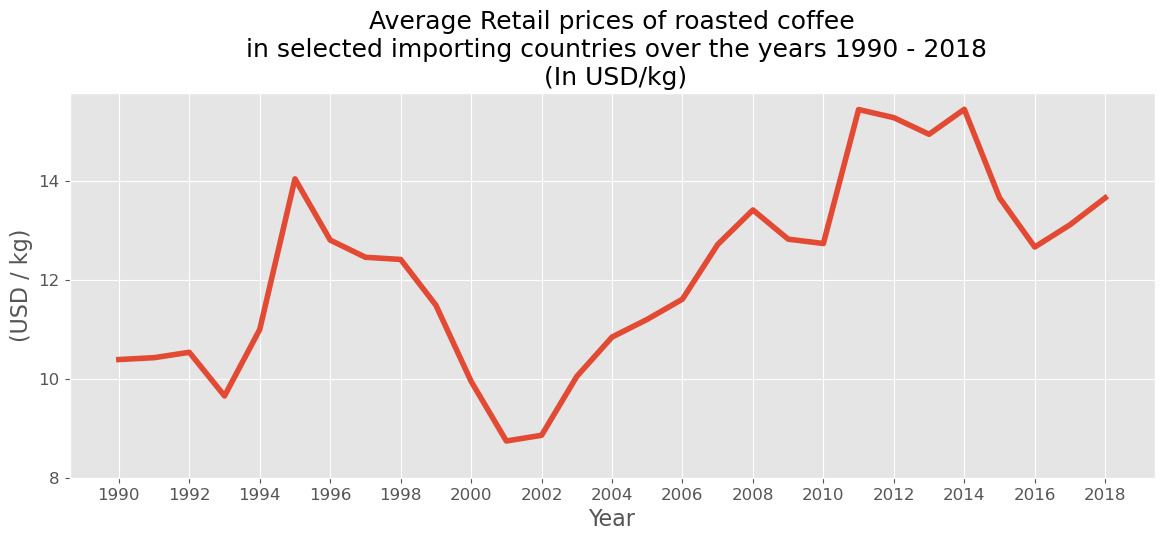

In [10]:
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average Retail prices of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In USD/kg)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks([j for j in range(8, 16, 2)], fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

<p>Creating Dataframe and summary</p>

In [11]:
country = input("Insert country name: ")
#country = "Norway" #    Example value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace('', np.nan)   #   Converting empty string  
                                            #    and 0 t 'Not a Number'
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)
dataframe.describe()

Insert country name: Norway
Chosen country: NORWAY


,Year,Value
0,1990,7.306843
1,1991,6.975717
2,1992,6.887417
3,1993,5.430464
4,1994,7.262693
...,...,...
24,2014,16.556291
25,2015,12.825607
26,2016,12.273731
27,2017,12.428256


SUMMARY
Year with highest value: 2014
Year with lowest value: 1993


,Value
count,29.000000
mean,9.409302
std,2.576316
min,5.430464
25%,7.306843
50%,8.874172
75%,11.147903
max,16.556291


<p>Creating graph</p>

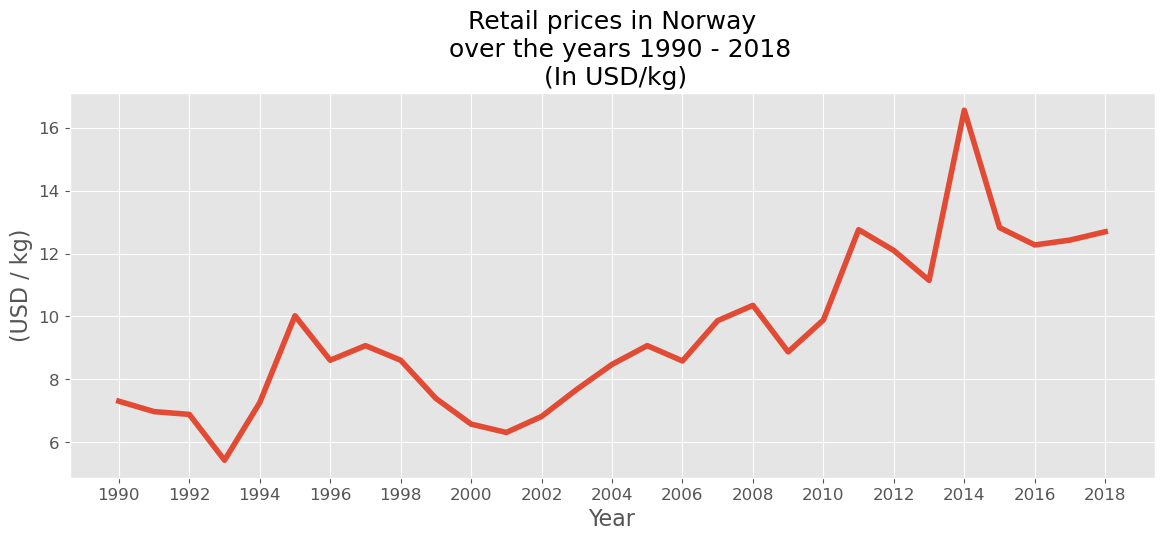

In [12]:
yearsCountry = list(dataframe['Year'])
valueCountry = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Retail prices in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In USD/kg)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

<p>Creating Dataframe and summary</p>

In [13]:
year = input("Insert year: ")
#year = "2018" #    Example value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)
dataframe.describe()

Insert year: 2018
Chosen year: 2018


,Country,Value
0,Austria,14.635762
1,Cyprus,12.781457
2,Denmark,11.699779
3,Finland,9.359823
4,France,8.123620
5,Germany,12.119205
6,Italy,17.924945
7,Netherlands,10.331126
8,Portugal,11.832230
9,Spain,9.050773


SUMMARY
Country with highest value: United Kingdom
Country with lowest value: Sweden


,Value
count,14.000000
mean,13.651845
std,8.235462
min,7.152318
25%,9.602649
50%,11.975717
75%,12.798013
max,40.618102


<p>Creating graph</p>

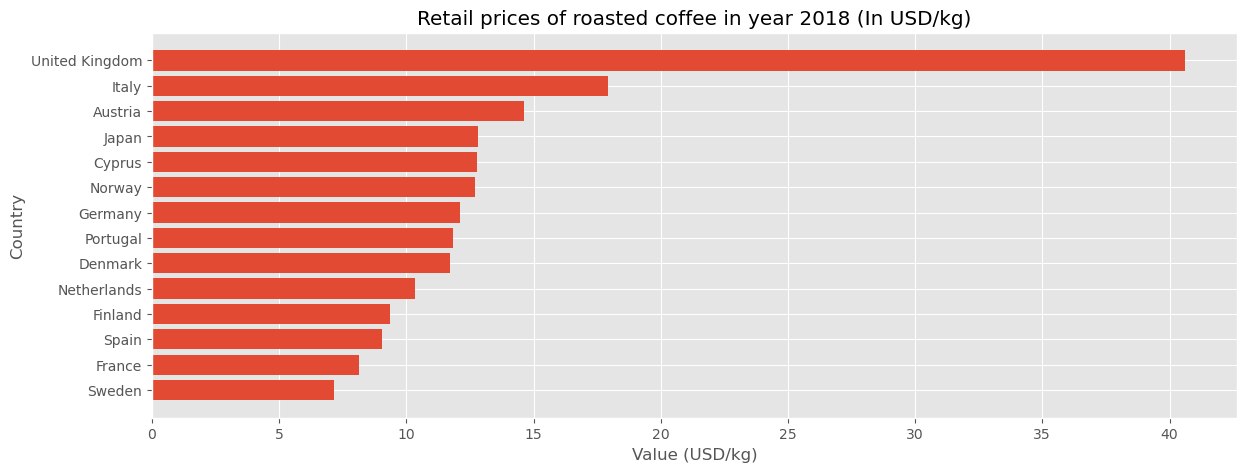

In [14]:
dataframe = dataframe.sort_values(by = 'Value', axis = 0)
countriesYear = list(dataframe['Country'])
valueYear = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.barh(countriesYear, valueYear)
plt.title("Retail prices of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (USD/kg)")

plt.show()

<h5>&emsp;<b>Imports</b></h5>

<p>&emsp;1. Total summary</p>

<p>Creating dataframe and summary</p>


In [15]:
table = 'imports'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", 25)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: '%s' in year: '%s'"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: '%s' in year: '%s'"% 
      (minRow.iloc[0], minRow.iloc[1]))
dataframe.describe()

,Country,Year,Value
0,Austria,1990,1880.0
1,Austria,1991,2058.0
2,Austria,1992,2206.0
3,Austria,1993,1836.0
4,Austria,1994,1417.0
...,...,...,...
1619,Niger,2014,24.0
1620,Niger,2015,25.0
1621,Niger,2014,12.0
1622,Niger,2017,11.0


SUMMARY
Country with highest value: 'USA' in year: '2017'
Country with lowest value: 'Chad' in year: '2001'


,Value
count,1431.000000
mean,1830.308948
std,4120.501935
min,0.000000
25%,16.000000
50%,322.000000
75%,1557.000000
max,29487.886460


<p>&emsp;2. Summary of average values over the years</p>

<p>Creating Dataframe and summary</p>


In [16]:
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)
dataframe.describe()

,Year,Average Value
0,1990,1390.980816
1,1991,1367.242649
2,1992,1480.317965
3,1993,1462.101786
4,1994,1429.119507
...,...,...
24,2014,742.797297
25,2015,967.357143
26,2016,1431.342105
27,2017,1002.730115


SUMMARY
Year with highest average value: 2013
Year with lowest average value: 2014


,Average Value
count,29.000000
mean,1620.422359
std,386.570064
min,742.797297
25%,1429.119507
50%,1642.821035
75%,1927.660714
max,2252.750000


<p>Creating graph</p>


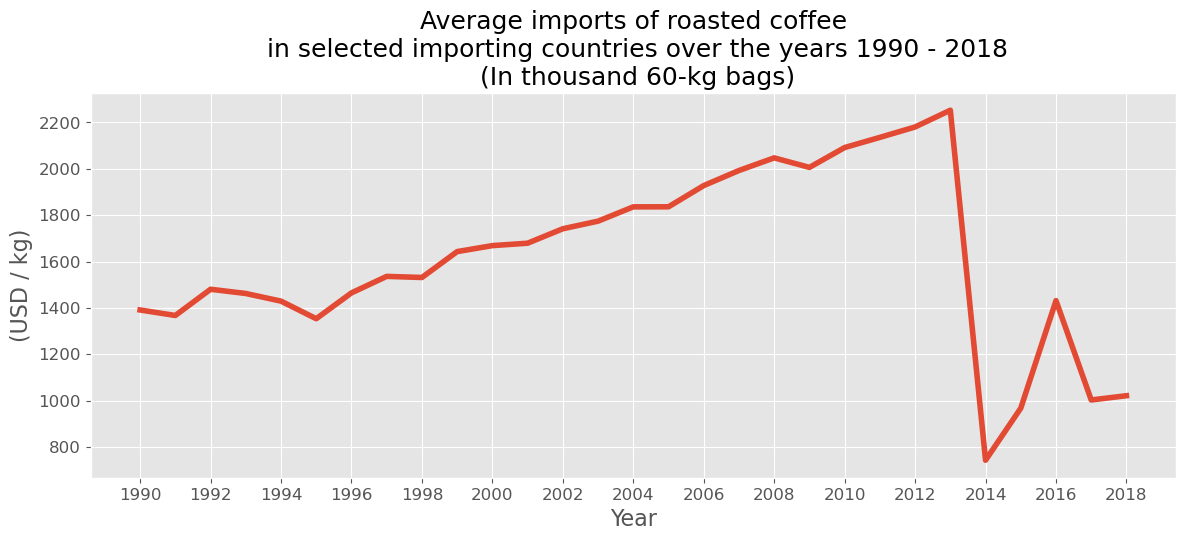

In [17]:
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average imports of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In thousand 60-kg bags)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

<p> Creating Dataframe and summary</p>


In [18]:
country = input("Insert country name: ")
#country = "Austria" #    Example value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['',0], np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)
dataframe.describe()

Insert country name: Austria
Chosen country: AUSTRIA


,Year,Value
0,1990,1880.0
1,1991,2058.0
2,1992,2206.0
3,1993,1836.0
4,1994,1417.0
5,1995,1231.0
6,1996,1210.0
7,1997,1294.0
8,1998,1293.0
9,1999,1500.0


SUMMARY
Year with highest value: 1992
Year with lowest value: 1996


,Value
count,24.000000
mean,1551.083333
std,280.243049
min,1210.000000
25%,1329.250000
50%,1476.000000
75%,1659.750000
max,2206.000000


<p>Creating graph</p>


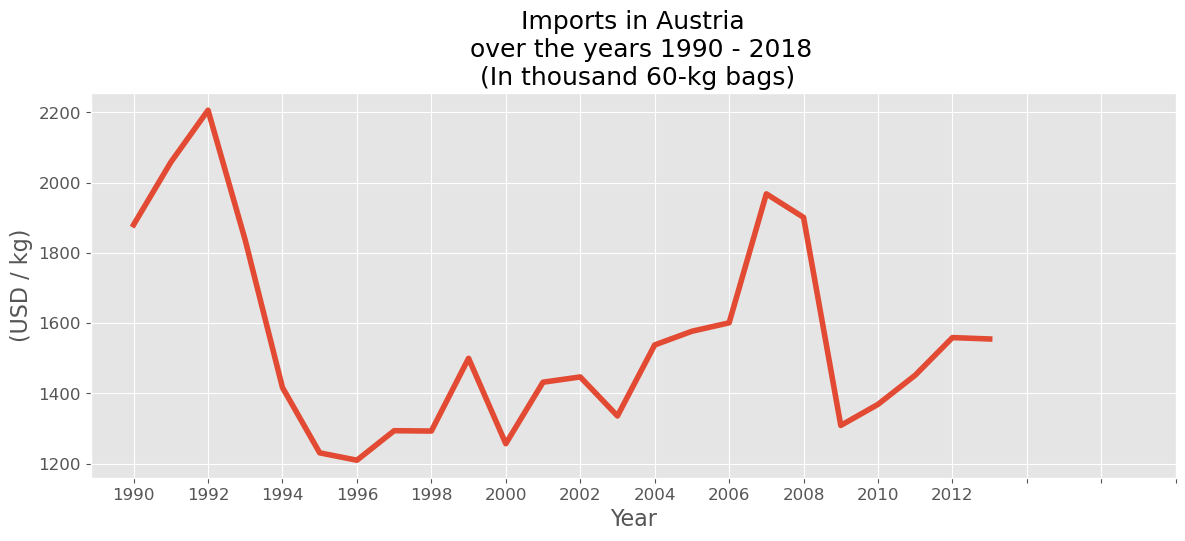

In [19]:
yearsCountry = list(dataframe["Year"])
valueCountry = list(dataframe["Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Imports in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In thousand 60-kg bags)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

<p>Creating Dataframe and summary</p>


In [20]:
year = input("Insert year: ")
#year = "2010" #    Example value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['', 0], np.nan)   # Converting empty string  
                                            # and 0 to 'Not a Number' value
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)
dataframe.describe()

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)
dataframe.describe()

Insert year: 2010
Chosen year: 2010


,Country,Value
0,Austria,1369.0
1,Belgium,5924.0
3,Bulgaria,528.0
4,Croatia,394.0
5,Cyprus,77.0
...,...,...
51,Mauritius,6.0
52,Morocco,582.0
53,Mozambique,4.0
54,Namibia,50.0


SUMMARY
Country with highest value: USA
Country with lowest value: Guinea-Bissau


,Value
count,54.000000
mean,2169.185185
std,4537.848871
min,1.000000
25%,52.500000
50%,461.000000
75%,1947.500000
max,24378.000000


<p>Creating graph</p>

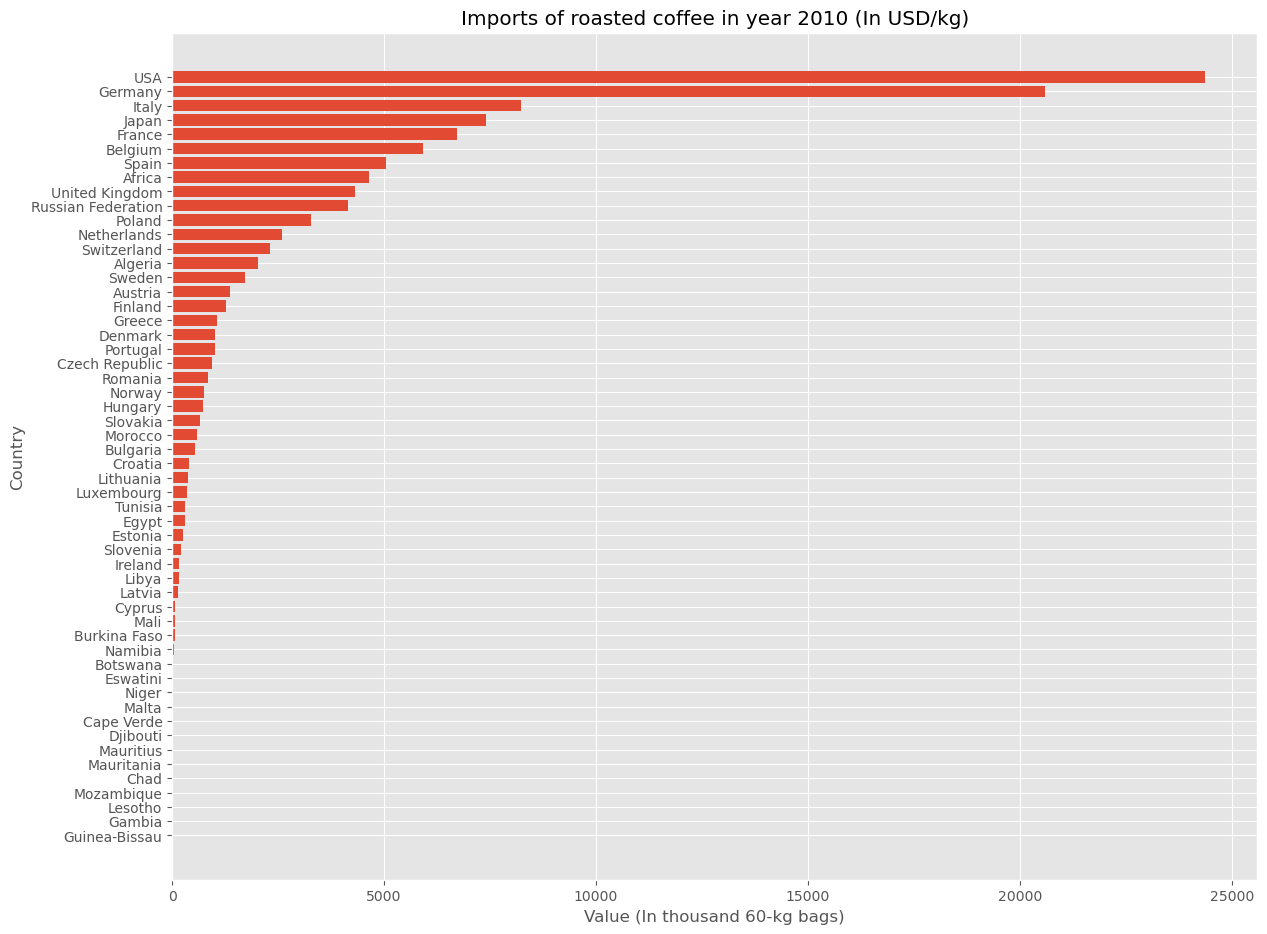

In [21]:
dataframe = dataframe.sort_values(by = 'Value', axis = 0)
countriesYear = list(dataframe['Country'])
valueYear = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,11))
plt.barh(countriesYear, valueYear)
plt.title("Imports of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (In thousand 60-kg bags)")

plt.show()

<h5>&emsp;<b>Total production</b></h5>

<p>&emsp;1. Total summary</p>

<p>Creating dataframe and summary</p>


In [22]:
table = 'production'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('', np.nan)   #   Converting empty string  
                                            # and 0 to 'Not a Number'
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", 25)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: '%s' in year: '%s'"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: '%s' in year: '%s'"% 
      (minRow.iloc[0], minRow.iloc[1]))
dataframe.describe()

,Country,Year,Value
0,Angola,1990,50.3450
1,Angola,1991,79.3310
2,Angola,1992,77.5200
3,Angola,1993,32.6080
4,Angola,1994,76.8020
...,...,...,...
1619,Yemen,2014,178.3814
1620,Yemen,2015,156.2460
1621,Yemen,2016,143.4533
1622,Yemen,2017,132.1281


SUMMARY
Country with highest value: 'Brazil' in year: '2018'
Country with lowest value: 'Timor-Leste' in year: '1990'


,Value
count,1624.000000
mean,2209.623978
std,6331.010350
min,0.000000
25%,35.974875
50%,337.865500
75%,1500.411250
max,62924.883600


<p>&emsp;2. Summary of average values over the years</p>

<p>Creating Dataframe and summary</p>


In [23]:
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)
dataframe.describe()

,Year,Average Value
0,1990,1664.822493
1,1991,1808.333650
2,1992,1759.391057
3,1993,1638.653957
4,1994,1666.307036
...,...,...
24,2014,2674.161466
25,2015,2749.779373
26,2016,2855.634704
27,2017,2822.753289


SUMMARY
Year with highest average value: 2018
Year with lowest average value: 1995


,Average Value
count,29.000000
mean,2209.623978
std,433.034780
min,1559.240325
25%,1844.689214
50%,2175.758211
75%,2544.203352
max,3052.441745


<p>Creating graph</p>

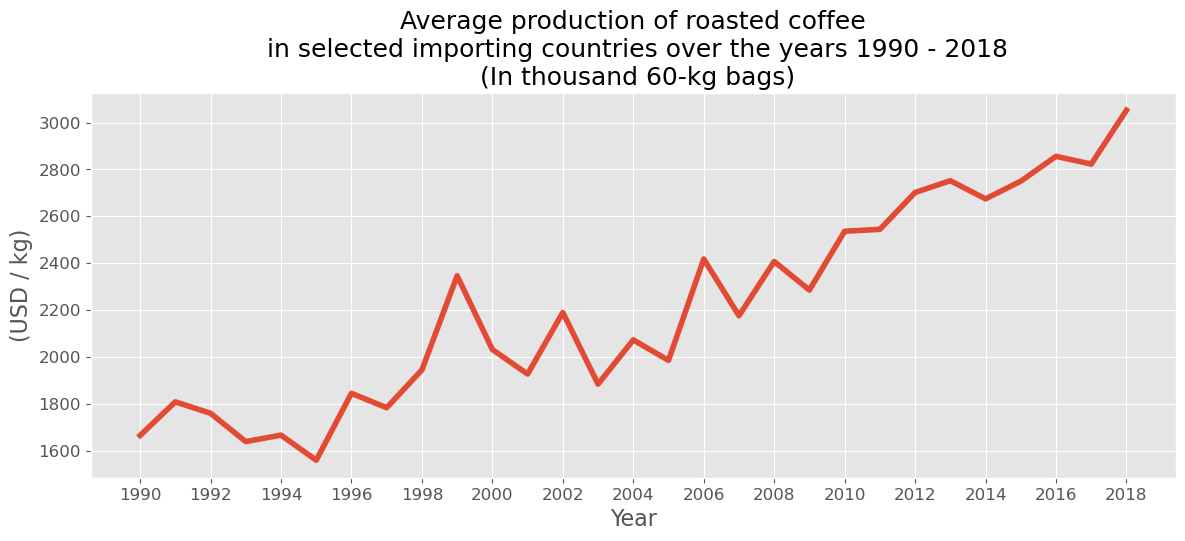

In [24]:
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average production of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In thousand 60-kg bags)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

<p>Creating Dataframe and summary</p>

In [25]:
country = input("Insert country name: ")
#country = "Angola" #    Example value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['',0], np.nan)   #   Converting empty string  
                                            #  and 0 to 'Not a Number'
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)
dataframe.describe()

Insert country name: Angola
Chosen country: ANGOLA


,Year,Value
0,1990,50.3450
1,1991,79.3310
2,1992,77.5200
3,1993,32.6080
4,1994,76.8020
...,...,...
24,2014,39.4050
25,2015,40.5150
26,2016,44.8300
27,2017,35.0060


SUMMARY
Year with highest value: 1998
Year with lowest value: 2009


,Value
count,29.000000
mean,45.256048
std,19.486885
min,13.420000
25%,34.935000
50%,39.405000
75%,56.640000
max,85.344000


<p>Creating graph</p>

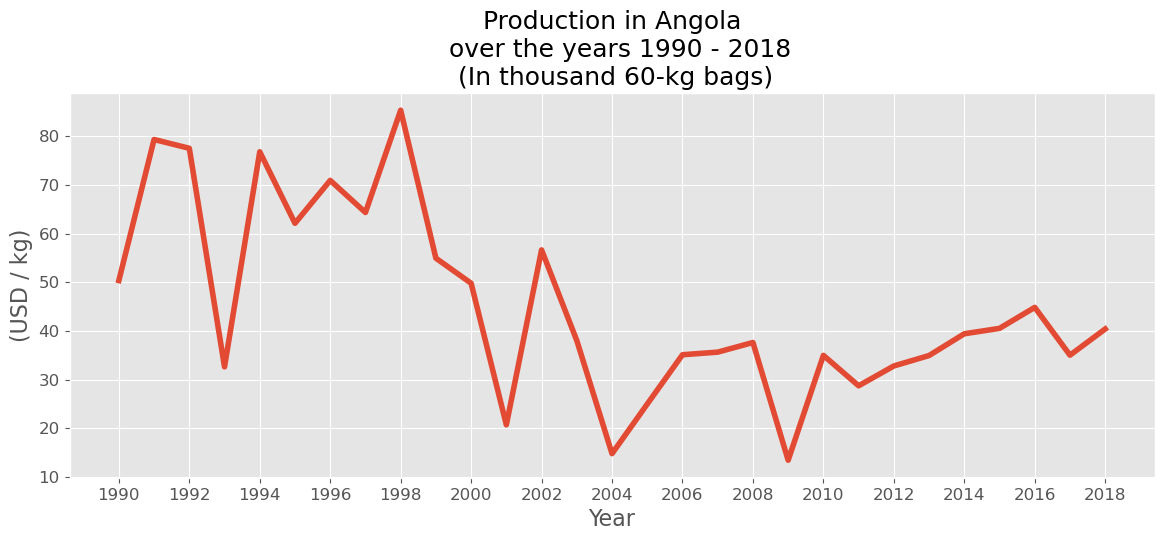

In [26]:
yearsCountry = list(dataframe["Year"])
valueCountry = list(dataframe["Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Production in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In thousand 60-kg bags)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

<p>Creating Dataframe and summary</p>

In [27]:
year = input("Insert year: ")
#year = "2018" #    Example value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['', 0], np.nan)   #   Converting empty string  
                                            # an 0 to 'Not a Number'
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)
dataframe.describe()

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)
dataframe.describe()


Insert year: 2018
Chosen year: 2018


,Country,Value
0,Angola,40.3874
1,Bolivia (Plurinational State of),82.5687
2,Brazil,62924.8836
3,Burundi,178.4206
4,Ecuador,601.0001
...,...,...
51,Trinidad & Tobago,12.3647
52,Uganda,4703.9640
53,Venezuela,525.2602
54,Viet Nam,31174.0742


SUMMARY
Country with highest value: Brazil
Country with lowest value: Equatorial Guinea


,Value
count,55.000000
mean,3107.940685
std,9543.058833
min,0.007000
25%,33.528000
50%,267.994900
75%,1300.758050
max,62924.883600


<p>Creating graph</p>


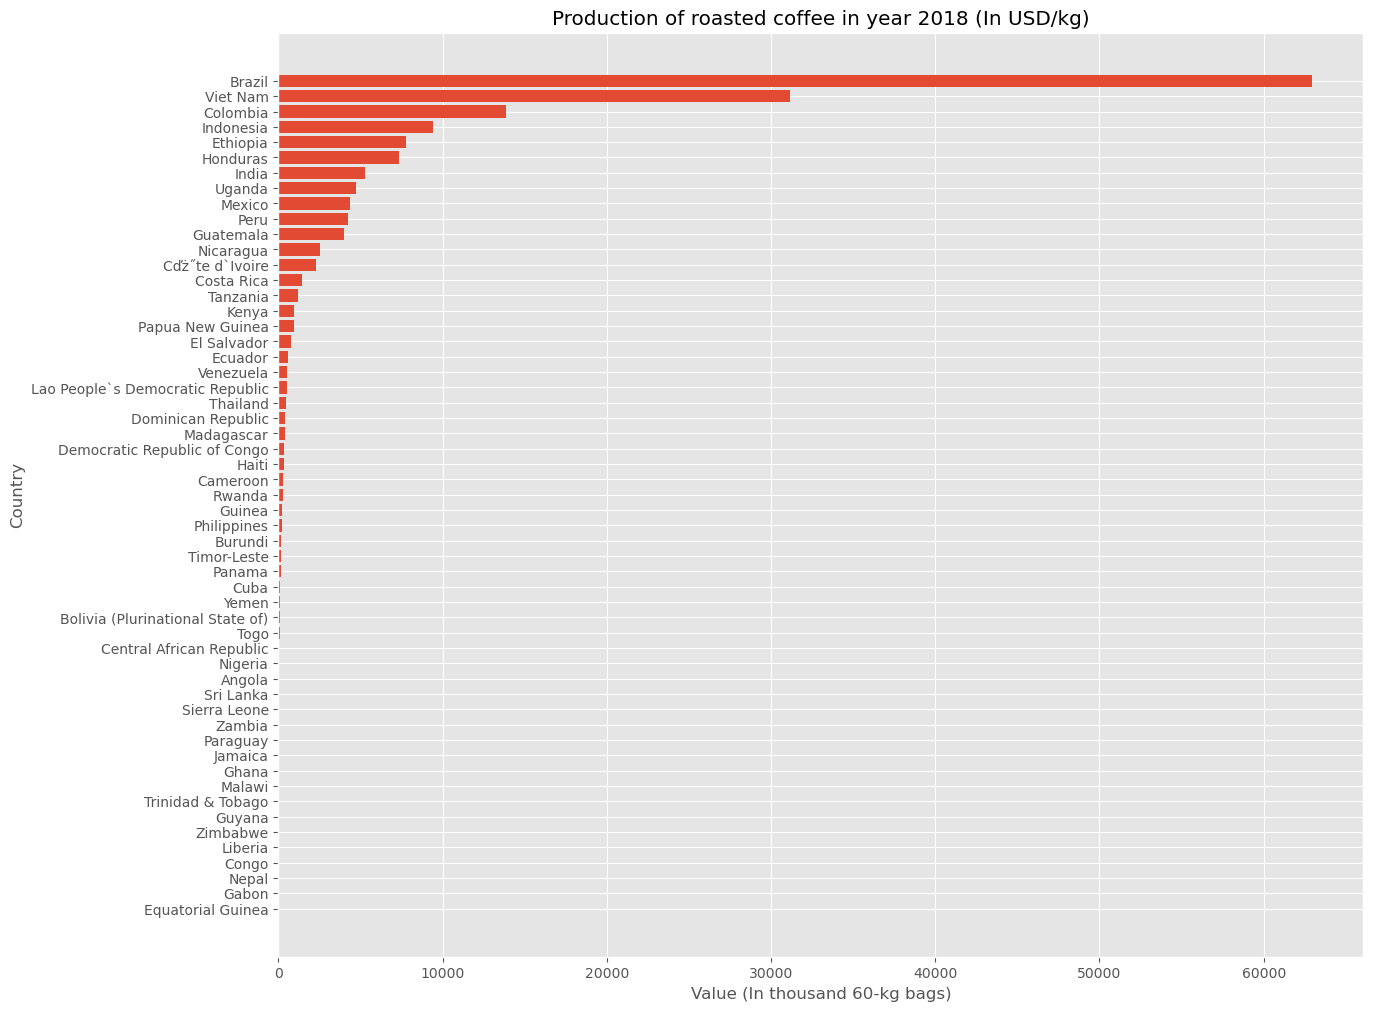

In [28]:
dataframe = dataframe.sort_values(by = 'Value', axis = 0)
countriesYear = list(dataframe['Country'])
valueYear = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,12))
plt.barh(countriesYear, valueYear)
plt.title("Production of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (In thousand 60-kg bags)")

plt.show()